In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list
)

In [4]:
df[['job_title_short', 'job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [6]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

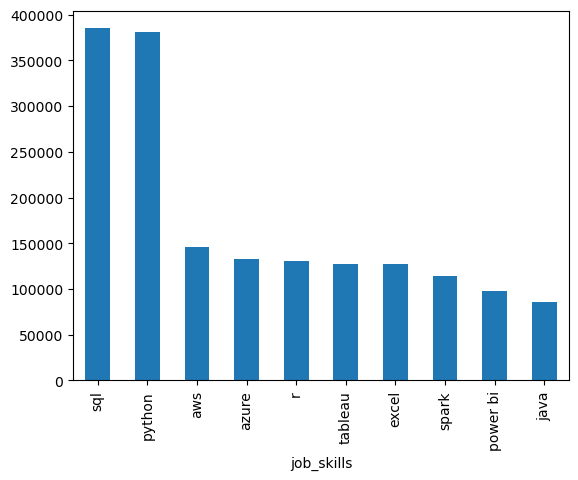

In [8]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [15]:
skill_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

In [16]:
df_skill_count = skill_count.reset_index(name='skill_count')

df_skill_count = df_skill_count.sort_values(by='skill_count', ascending=False)

In [17]:
df_skill_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
45,Business Analyst,digitalocean,1
2241,Software Engineer,visualbasic,1
29,Business Analyst,codecommit,1
24,Business Analyst,chainer,1


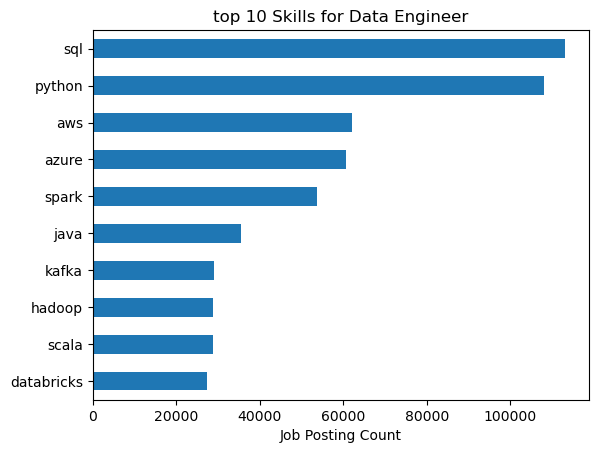

In [22]:
job_title = 'Data Engineer'
top_skills = 10

df_skill_final = df_skill_count[df_skill_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'top {top_skills} Skills for {job_title}')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)